# Data Preparation

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
#Read Data
sheet_url = 'https://docs.google.com/spreadsheets/d/10poofg-l8DMdtUgGy8mOpra2IHmA9EQC7drmF9AyYHA/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') 
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [3]:
# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


## Data Cleaning

In [4]:
#Drop Duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.9+ KB


In [6]:
2/177*100

1.1299435028248588

**If the amount is less than 5%, it can be deleted/dropped.**

In [5]:
#Check Empty Values
df.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [7]:
36/175*100

20.57142857142857

**These empty values fulfill 20% of the data, so they cannot be deleted because they are quite large (risky).**

In [8]:
# Check Release datatype
df['Release']

0      12/1/2017
1      11/1/2011
2       5/1/2012
3      11/1/2006
4       5/1/2011
         ...    
170     3/1/2003
171     9/1/2008
172    11/1/1999
173    12/1/1994
174    10/1/2001
Name: Release, Length: 175, dtype: object

In [10]:
# Convert Release Data Type from object to datetime
df['Release'] = pd.to_datetime(df['Release'], format='%m/%d/%y') #the format is adjusted to the initial conditions of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [12]:
# Export to csv
df.to_csv("games_dataset_cleaned.csv", index=False)

In [11]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,1999-11-01,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


# Questions

## 1. Which game is the oldest and the newest games in that dataset?

In [14]:
df_1 = df[['Name','Release']]
df_1

,Name,Release
0,PlayerUnknown's Battlegrounds,2017-12-01
1,Minecraft,2011-11-01
2,Diablo III,2012-05-01
3,Garry's Mod,2006-11-01
4,Terraria,2011-05-01
...,...,...
170,Vietcong,2003-03-01
171,Warhammer Online: Age of Reckoning,2008-09-01
172,Who Wants to Be a Millionaire?,1999-11-01
173,Wing Commander 3: Heart of the Tiger,1994-12-01


In [22]:
#Oldest Games -> Sort in ascending order (default) 
df_1.sort_values('Release').head(1)

,Name,Release
133,Hydlide,1984-12-01


In [21]:
#Newest Games
df_1.sort_values('Release', ascending=False).head(1)

,Name,Release
20,Valheim,2021-02-01


**The oldest game is Hydlide** which was released on December 1, 1984 and **the newest game is Valheim** which was released on February 1, 2021.

## 2.Which publisher published most of the games?

In [25]:
df_2 = df[['Name','Publisher']]
df_2

,Name,Publisher
0,PlayerUnknown's Battlegrounds,Krafton
1,Minecraft,Mojang Studios
2,Diablo III,Blizzard Entertainment
3,Garry's Mod,Valve
4,Terraria,Re-Logic
...,...,...
170,Vietcong,Gathering of Developers
171,Warhammer Online: Age of Reckoning,Electronic Arts
172,Who Wants to Be a Millionaire?,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,Electronic Arts


In [30]:
# Group data by the same Publisher
# Count how many games from the same publisher
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False) # Sort in descending order

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


**Create a bar plot with X = Publisher and Y = Game Name axes. Games names are sorted from largest. The barplot display shows the top 10 game names.**

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Publisher', ylabel='Name'>

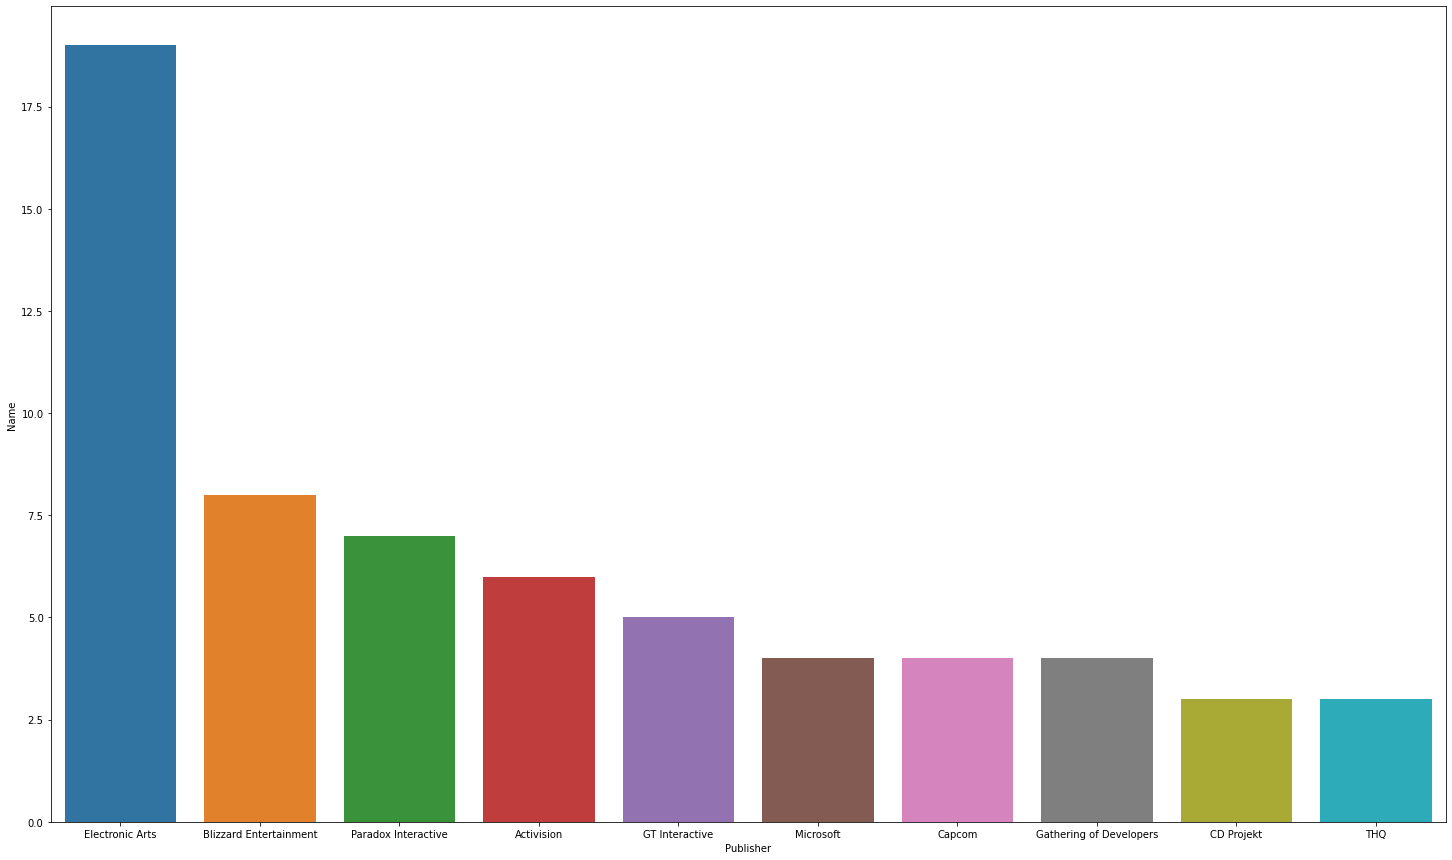

In [35]:
plt.figure(figsize=[25,15])
sns.barplot('Publisher','Name', data=agg_publisher.sort_values('Name',ascending=False).head(10))

The chart shows that **Electronic Arts** publishes **19 games**. This means that Electronic Arts is the publisher that publishes the most games (10.9% out of all the games).

## 3. Which developer most of the games?

In [37]:
df_3 = df[['Name','Developer']]
df_3

,Name,Developer
0,PlayerUnknown's Battlegrounds,PUBG Studios
1,Minecraft,Mojang Studios
2,Diablo III,Blizzard Entertainment
3,Garry's Mod,Facepunch Studios
4,Terraria,Re-Logic
...,...,...
170,Vietcong,Pterodon
171,Warhammer Online: Age of Reckoning,Mythic Entertainment
172,Who Wants to Be a Millionaire?,Jellyvision
173,Wing Commander 3: Heart of the Tiger,Origin Systems


In [40]:
# Grouping Data by the same Developer
agg_dev = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_dev.sort_values('Name', ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Developer', ylabel='Name'>

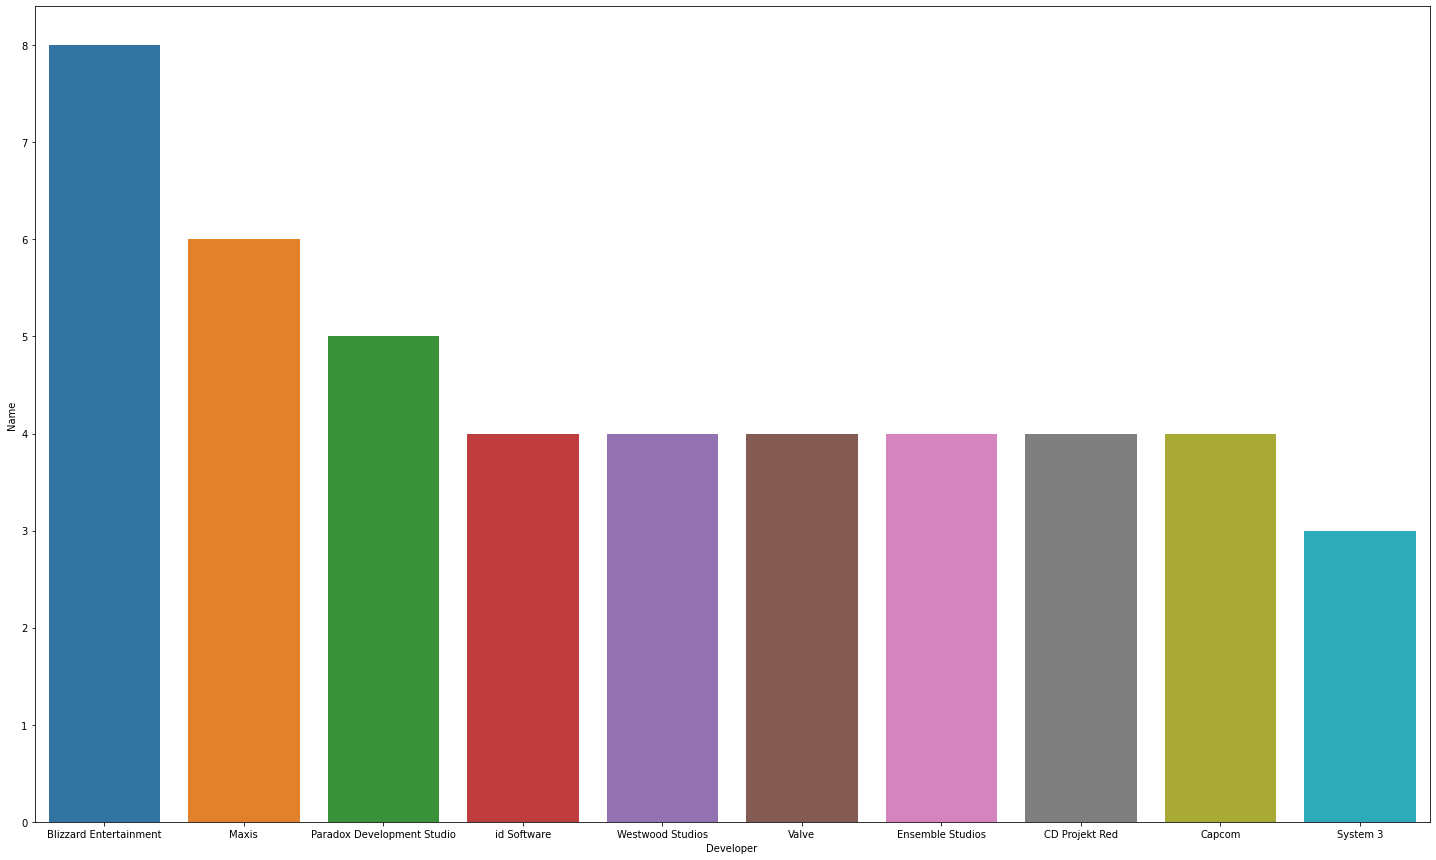

In [41]:
plt.figure(figsize=[25,15])
sns.barplot('Developer','Name', data=agg_dev.sort_values('Name', ascending=False).head(10))

**Blizzard Entertainment** develops the most games from other developers, which are **8 games**.

## 4. Which series is the most of sales?

In [42]:
df_4 = df[['Series', 'Sales']]
df_4

,Series,Sales
0,NaN,42.0
1,Minecraft,33.0
2,Diablo,20.0
3,NaN,20.0
4,NaN,17.2
...,...,...
170,Vietcong,1.0
171,Warhammer,1.0
172,NaN,1.0
173,Wing Commander,1.0


In [44]:
#Aggregat
agg_series = df.groupby('Series', as_index=False).agg({'Sales':'sum','Name':'nunique'})
agg_series.sort_values('Sales', ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Series', ylabel='Sales'>

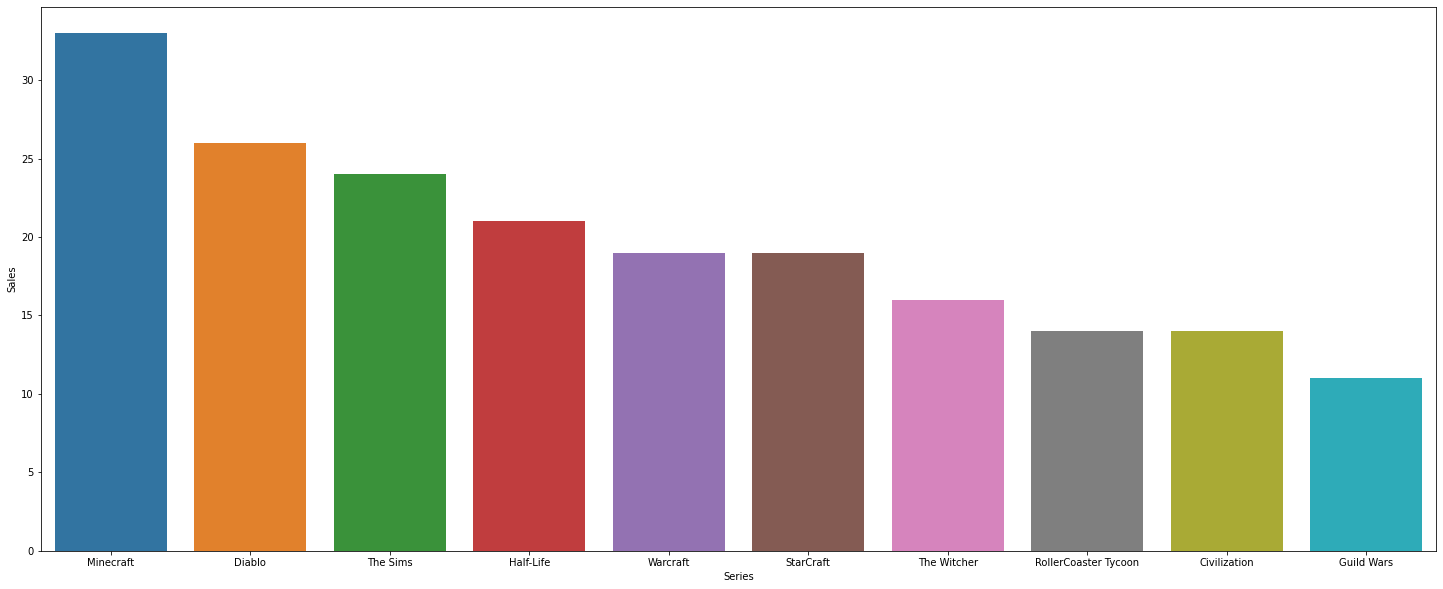

In [45]:
plt.figure(figsize=[25,10])
sns.barplot('Series','Sales', data = agg_series.sort_values('Sales', ascending=False).head(10))

Based on the plot of the top 3 best selling series, it can be seen that **Minecraft** generates sales of **33 Million** which Minecraft has the most sales of other games.

## 5. Which series have the most games?

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Series', ylabel='Name'>

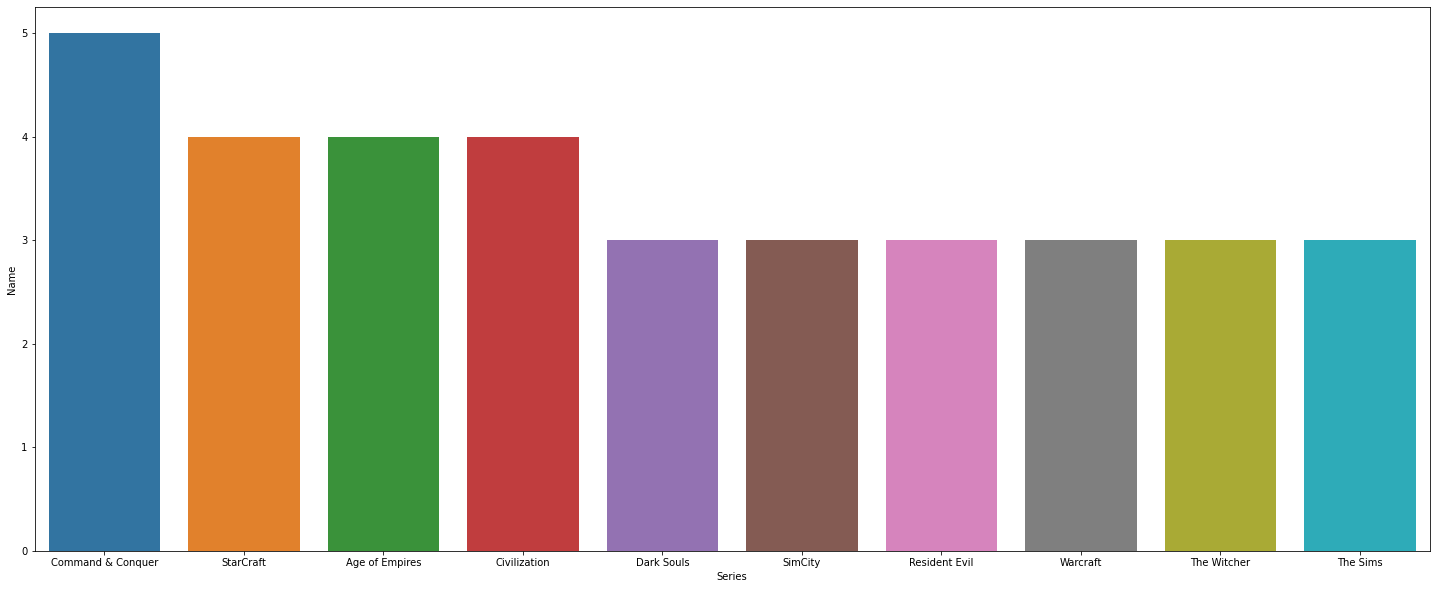

In [50]:
plt.figure(figsize=[25,10])
sns.barplot('Series','Name', data=agg_series.sort_values('Name',ascending=False).head(5))

**Command & Conquer** series has **5 games**, so this series can be said to have the most games from other series.